In [1]:
import pandas as pd

In [2]:
df1=pd.read_csv("ttrain.csv")
df2=pd.read_csv("ttest.csv")

In [3]:
df1.shape,df2.shape

((891, 12), (418, 11))

In [4]:
df1.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C


In [5]:
df2.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
235,1127,3,"Vendel, Mr. Olof Edvin",male,20.0,0,0,350416,7.8542,NaN,S


In [6]:
df=df1.append(df2)

/var/folders/3x/n1kkdkgn5m9c3thf3ctlb_xm0000gn/T/ipykernel_4997/2456558213.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


In [7]:
# DRY- 

In [8]:
df.shape

(1309, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [10]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [11]:
df.shape

(1309, 12)

In [12]:
df['Fare'].mean()

33.2954792813456

In [13]:
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [14]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [16]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [17]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [18]:
df['Embarked']=df['Embarked'].fillna('S')

In [19]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [20]:
import seaborn as sns

<AxesSubplot:xlabel='Embarked', ylabel='count'>

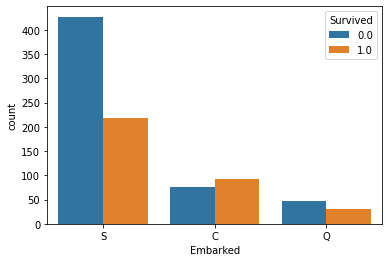

In [21]:
sns.countplot(x='Embarked',hue="Survived",data=df)

In [22]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
450,451,0.0,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S
347,1239,NaN,3,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,NaN,C
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
109,110,1.0,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S


In [23]:
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [24]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [25]:
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [26]:
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Rev','Jonkheer','Don','Sir','Col','Major','Dr','Capt'],'Mr')

In [27]:
df['Title'].value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [28]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             0
dtype: int64

In [29]:
1014/1309

0.774637127578304

In [30]:
del df['Cabin']

In [31]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

/Users/bmaho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

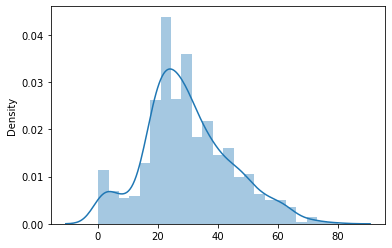

In [32]:
sns.distplot(x=df.Age)

In [33]:
df['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [34]:
df.groupby('Sex')['Age'].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [35]:
df['Age']=df['Age'].fillna(df.groupby('Title')['Age'].transform("median"))

In [36]:
df['Family']=df['SibSp']+df['Parch'] +1

/Users/bmaho/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Family', ylabel='count'>

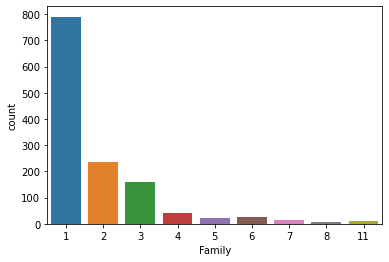

In [37]:
sns.countplot(df['Family'])

In [38]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
Family           0
dtype: int64

In [39]:
df.drop(['PassengerId','Ticket','Name'],axis=1,inplace=True)

In [40]:
df.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
831,1.0,2,male,0.83,1,1,18.75,S,Master,3


In [41]:
data=pd.get_dummies(df,drop_first=True)

In [42]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,30.0,0,0,8.0500,1,1,0,1,0,1,0
414,NaN,1,39.0,0,0,108.9000,1,0,0,0,0,0,1
415,NaN,3,38.5,0,0,7.2500,1,1,0,1,0,1,0
416,NaN,3,30.0,0,0,8.0500,1,1,0,1,0,1,0


In [102]:
train=data[:891]
test=data[891:]

In [103]:
test

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,NaN,3,34.5,0,0,7.8292,1,1,1,0,0,1,0
1,NaN,3,47.0,1,0,7.0000,2,0,0,1,0,0,1
2,NaN,2,62.0,0,0,9.6875,1,1,1,0,0,1,0
3,NaN,3,27.0,0,0,8.6625,1,1,0,1,0,1,0
4,NaN,3,22.0,1,1,12.2875,3,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,30.0,0,0,8.0500,1,1,0,1,0,1,0
414,NaN,1,39.0,0,0,108.9000,1,0,0,0,0,0,1
415,NaN,3,38.5,0,0,7.2500,1,1,0,1,0,1,0
416,NaN,3,30.0,0,0,8.0500,1,1,0,1,0,1,0


In [104]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,27.0,0,0,13.0000,1,1,0,1,0,1,0
887,1.0,1,19.0,0,0,30.0000,1,0,0,1,1,0,0
888,0.0,3,22.0,1,2,23.4500,4,0,0,1,1,0,0
889,1.0,1,26.0,0,0,30.0000,1,1,0,0,0,1,0


In [105]:
y=train['Survived']

In [106]:
x=train.drop('Survived',axis=1)

In [107]:
test=test.drop('Survived',axis=1)

In [108]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g=GaussianNB()

In [109]:
g.fit(x,y)

GaussianNB()

In [110]:
tahmin=g.predict(test)

In [111]:
tahmin

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [51]:
df.shape

(1309, 10)

In [52]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [53]:
df1.shape

(891, 12)

In [54]:
df2.shape

(418, 11)

In [55]:
sonuc=df2[['PassengerId']]

In [56]:
sonuc['Survived']=tahmin

/var/folders/3x/n1kkdkgn5m9c3thf3ctlb_xm0000gn/T/ipykernel_4997/2725349856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc['Survived']=tahmin


In [112]:
sonuc.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [58]:
sonuc['Survived']=sonuc['Survived'].astype('int32')

/var/folders/3x/n1kkdkgn5m9c3thf3ctlb_xm0000gn/T/ipykernel_4997/699227836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc['Survived']=sonuc['Survived'].astype('int32')


In [59]:
sonuc.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [60]:
sonuc.to_csv('titanic_tahmin.csv', index=False)

In [61]:
b=BernoulliNB()

In [62]:
b.fit(x,y)

BernoulliNB()

In [63]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [113]:
tahmin2=b.predict(test)

In [114]:
test

,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,3,34.5,0,0,7.8292,1,1,1,0,0,1,0
1,3,47.0,1,0,7.0000,2,0,0,1,0,0,1
2,2,62.0,0,0,9.6875,1,1,1,0,0,1,0
3,3,27.0,0,0,8.6625,1,1,0,1,0,1,0
4,3,22.0,1,1,12.2875,3,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,30.0,0,0,8.0500,1,1,0,1,0,1,0
414,1,39.0,0,0,108.9000,1,0,0,0,0,0,1
415,3,38.5,0,0,7.2500,1,1,0,1,0,1,0
416,3,30.0,0,0,8.0500,1,1,0,1,0,1,0


In [101]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,27.0,0,0,13.0000,1,1,0,1,0,1,0
887,1.0,1,19.0,0,0,30.0000,1,0,0,1,1,0,0
888,0.0,3,22.0,1,2,23.4500,4,0,0,1,1,0,0
889,1.0,1,26.0,0,0,30.0000,1,1,0,0,0,1,0


In [121]:
accuracy_score(tahmin2,y)

ValueError: Found input variables with inconsistent numbers of samples: [418, 891]

In [97]:
print(classification_report(tahmin2,y))

ValueError: Found input variables with inconsistent numbers of samples: [418, 891]

In [67]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()

In [68]:
k.fit(x,y)

KNeighborsClassifier()

In [124]:
tahmin3=k.predict(test)

In [127]:
tahmin3

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1.

In [126]:
print(classification_report(tahmin3,test))

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [71]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()

In [72]:
l.fit(x,y)

/Users/bmaho/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [128]:
tahmin4=l.predict(test)

In [150]:
sonuc4=df2[['PassengerId']]

In [151]:
sonuc4['Survived']=tahmin4

/var/folders/3x/n1kkdkgn5m9c3thf3ctlb_xm0000gn/T/ipykernel_4997/289119549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc4['Survived']=tahmin4


In [152]:
sonuc4['Survived']=sonuc4['Survived'].astype('int32')

/var/folders/3x/n1kkdkgn5m9c3thf3ctlb_xm0000gn/T/ipykernel_4997/1244459495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc4['Survived']=sonuc4['Survived'].astype('int32')


In [153]:
sonuc4.to_csv('titanic_tahmin4.csv', index=False)

In [74]:
print(classification_report(tahmin4,y))

              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86       572
         1.0       0.74      0.79      0.76       319

    accuracy                           0.82       891
   macro avg       0.81      0.82      0.81       891
weighted avg       0.83      0.82      0.83       891



In [75]:
confusion_matrix(tahmin4,y)

array([[482,  90],
       [ 67, 252]])

In [129]:
tahmin4

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [130]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()

In [132]:
d.fit(x,y)

DecisionTreeClassifier()

In [133]:
tahmin5=d.predict(test)

In [134]:
tahmin5

array([0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0.

In [80]:
df.shape

(1309, 10)

In [81]:
df1.shape

(891, 12)

In [82]:
df2.shape

(418, 11)

In [157]:
confusion_matrix(tahmin5,y)

ValueError: Found input variables with inconsistent numbers of samples: [418, 891]

In [84]:
print(classification_report(tahmin5,y))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       563
         1.0       0.95      0.99      0.97       328

    accuracy                           0.98       891
   macro avg       0.97      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891



In [135]:
sonuc5=df2[['PassengerId']]

In [86]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [136]:
sonuc5['Survived']=tahmin5

/var/folders/3x/n1kkdkgn5m9c3thf3ctlb_xm0000gn/T/ipykernel_4997/2785118553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc5['Survived']=tahmin5


In [137]:
sonuc5['Survived']=sonuc5['Survived'].astype('int32')

/var/folders/3x/n1kkdkgn5m9c3thf3ctlb_xm0000gn/T/ipykernel_4997/953812355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc5['Survived']=sonuc5['Survived'].astype('int32')


In [148]:
sonuc5.to_csv('titanic_tahmin5.csv', index=False)

In [139]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()

In [140]:
r.fit(x,y)

RandomForestClassifier()

In [141]:
tahmin6=r.predict(test)

In [ ]:
confusion_matrix(tahmin6,y)

In [142]:
sonuc6=df2[['PassengerId']]

In [144]:
sonuc6['Survived']=tahmin6

/var/folders/3x/n1kkdkgn5m9c3thf3ctlb_xm0000gn/T/ipykernel_4997/2517860698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc6['Survived']=tahmin6


In [145]:
sonuc6['Survived']=sonuc6['Survived'].astype('int32')

/var/folders/3x/n1kkdkgn5m9c3thf3ctlb_xm0000gn/T/ipykernel_4997/1490559687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc6['Survived']=sonuc6['Survived'].astype('int32')


In [147]:
sonuc6.to_csv('titanic_tahmin6.csv', index=False)

In [ ]:
print(classification_report(tahmin6,y))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
h=GradientBoostingClassifier()

In [159]:
h.fit(x,y)

NameError: name 'h' is not defined

In [158]:
tahmin7=h.predict(test)

NameError: name 'h' is not defined

In [ ]:
confusion_matrix(tahmin7,y)

In [ ]:
print(classification_report(tahmin7,y))